In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Regressão Logística para classificação binária

Este método utiliza do conceito de regressão para fazer algo parecido com o que faz o algoritmo do Perceptron, mas ao invés de apenas retornar as classes de cada ponto, ele também nos dirá a probabilidade de um ponto pertencer a cada classe.

Input: $\vec{x_{i}}=(x_{1},x_{2},...,x_{d})$

Fazendo: $x_{i}=(1,\vec{x_{i}})$  ,  
        $w=(w_{0},w_{1},...,w_{d})$  ,   
        $\sigma(x)=\frac{1}{1+e^x}$.
        
A função de ativação fica: $h=\sigma(\vec w\cdot \vec x)$
        
Chutamos os pesos: $\vec{w_{0}}$

A função de custo será: $\frac{1}{N}\Sigma_{n} (y_{n}Log(h)+(1-y_n)Log(1-h))$

Então atualizamos os pesos usando a derivada da função de custo: $dw_{j}=\Sigma_{n}  (y_{n}-h_{n}) x_{j}$

In [2]:
class grad:
    
    def __init__(self,x,y):
        # Define as dimensões do input
        if len(x.shape) == 1:
            self.dim = 1
        else:
            self.dim = x.shape[1]
        self.n = len(y)
        
        # vetor input estendido
        X = np.zeros((self.n,self.dim+1))
        for i in range (self.n):
            X[i] = np.concatenate((1,x[i]),axis=None)
        self.X = X.T
        self.x = x
        self.Y = y
        
    # Função sigmoide usada na ativação
    def sigmo(self,x):
        return 1/(1+np.exp(-x))
    
    # função custo
    def cost(self,w):
        Y = self.Y
        N = self.n
        A = self.sigmo(np.dot(w.T,self.X))
        return -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/N
    
    
    # algoritimo descida gradiente
    # (h=taxa de aprend. v=nº iterações)
    def desce(self,h,v):
        X = self.X
        Y = self.Y
        N = self.n
        w = np.random.rand(self.dim+1)
        # vetor pra guardar info de como o custo evolui com o tempo
        c = np.zeros(v+1)
        
        for i in range (v):
            c[i] = self.cost(w)
            
            dw = np.zeros(len(w))
            Z = np.dot(w.T,X)
            A = Y - self.sigmo(Z)
            
            dw = np.dot(X,A.T)
            
            w = w + h*dw
            C = self.cost(w)
            
           # checa se a função custo está diminuindo
            if c[i] > C:
                c[i+1] = C
                
            # senão, refaz o passo usando uma taxa de aprend. menor
            # (isso já é um passo extra que eu coloquei pra não deixar
            # o gradiente explodir)
            if C > c[i]:
                w = w - h*dw
                h = 3*h/4
                v = v - 1
                #print(h)
                
        self.W=w
        
        # retorna os pesos atualizados e o historico da função custo
        return w, c
    
    
    # Retorna a classe e probabilidades de um único imput
    def testa(self,q,w):
        Q = np.concatenate((1,q),axis=None)
        prob = self.sigmo(np.dot(w.T,Q))
        if prob > 0.5:
            print('O ponto',q,'é azul com prob', np.round(prob,3))
            if type(q) == float:
                return prob
        else:
            print('O ponto',q,'é vermelho com prob', np.round(1-prob,3))
            if type(q) == float:
                return 1-prob
    
    
    # Reta (ou plano ou hyperplano) que divide os pontos
    def reta(self,W):
        m = len(W)
        
        X = np.zeros([self.dim,self.n])
        if self.dim == 1:
            X = x
        else:
            for i in range (self.dim):
                X[i] = self.x[:,i]
                
        if self.dim == 1:
            z = np.linspace(np.min(X)-0.5,np.max(X)+0.5,100)
            Z = np.zeros(100)
            for k in range (100):
                Z[k] = W[0] + W[1]*z[k]         
            
        else:
            z = np.zeros([self.dim-1,100])
            for i in range (self.dim-1):
                z[i] = np.linspace(np.min(X[i]) - 0.5,np.max(X[i])+0.5,100)
            
            Z = np.zeros(100)
            for k in range (100):
                Z[k] = -W[0]/W[m-1]
                for i in range(self.dim-1):
                    Z[k] = Z[k] - W[i+1]*z[i][k]/W[m-1]
        
        # retorna "eixos" x e y da reta
        return z, Z
        
    
    # plota pontos com a reta (vale só pra 2D)
    def desenhar_r(self,x,y,w):
        reta = self.reta(w)
        if self.dim == 1:
            X = x
            Y = y
            z = reta[0]
            Z = reta[1]
        else:
            X = x[:,0]
            Y = x[:,1]
            z = reta[0][0]
            Z = reta[1]
        
        for i in range (len(X)):
            if y[i] == 1:
                pl.scatter(X[i],Y[i],c='b')
            else:
                pl.scatter(X[i],Y[i],c='r')
        
        pl.plot(z,Z)
        pl.ylim(np.min(Y)-0.5,np.max(Y)+0.5)
        
    
    
    # plota só os pontos (só 2D)
    def pontos(self,x,y):
        if self.dim == 1:
            X = x
            Y = y
        else:
            X = x[:,0]
            Y = x[:,1]
        
        for i in range (len(X)):
            if y[i] == 1:
                pl.scatter(X[i],Y[i],c='b')
            else:
                pl.scatter(X[i],Y[i],c='r')
        
        pl.xlim(np.min(X)-0.5,np.max(X)+0.5)
        pl.ylim(np.min(Y)-0.5,np.max(Y)+0.5)

# Teste 2D

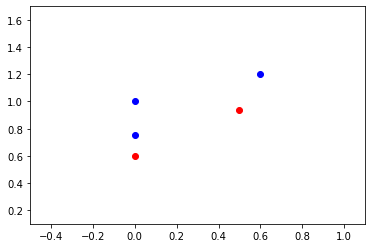

In [3]:
# input
x = np.array([[0,0.75],[0,1],[0.6,1.2],[0.5,0.94],[0.0,0.6]])
# output
y = np.array([1,1,1,0,0])

cor = grad(x,y)
# plota só os pontos
cor.pontos(x,y)

O ponto (0.9, 1.2) é vermelho com prob 0.585


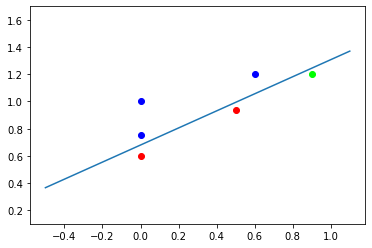

In [4]:
# taxa de aprendizado e nº maximo de iterações
h, v = 0.5, 150

# pesos e histórico da função de custo
w, c = cor.desce(h,v)[0],cor.desce(h,v)[1]

# desenha a reta
cor.desenhar_r(x,y,w)

# prevê um ponto
q = (0.9,1.2)
cor.testa(q,w)
pl.scatter(q[0],q[1],c='lime')
pl.show()

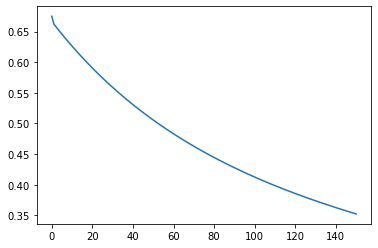

In [5]:
# histórico da função de custo
z = np.arange(0,len(c),1)
pl.plot(z,c)

# Teste 1D

Nesse caso, o eixo y representará a probabilidade do ponto pertencer à classe azul.

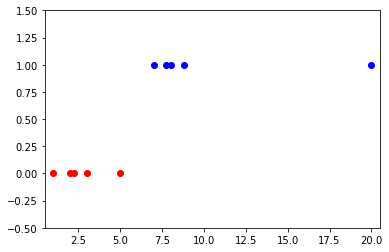

In [6]:
# input
x = np.array([1,2,2.25,3,5,7,7.75,8,8.81,20])
# output
y = np.array([0,0,0,0,0,1,1,1,1,1])

ex = grad(x,y)
ex.pontos(x,y)

O ponto 6.0 é azul com prob 0.659


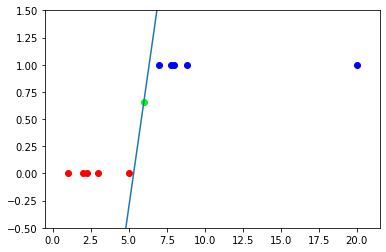

In [7]:
# taxa de aprendizado e nº maximo de iterações
h, v = 0.1, 500

# pesos e histórico da função de custo
w, c = ex.desce(h,v)[0],ex.desce(h,v)[1]

# desenha a reta
ex.desenhar_r(x,y,w)

# prevê um ponto
q = (6)
Z = cor.testa(float(q),w)
pl.scatter(q,Z,c='lime')

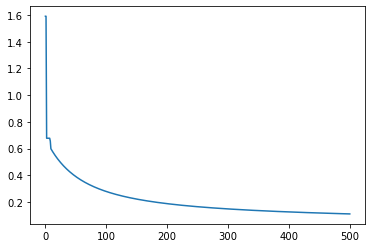

In [8]:
# histórico da função de custo
z = np.arange(0,len(c),1)
pl.plot(z,c)